# CS50 Final Project: Exploring Weather Temperatures

## Introduction
This case study is for the Final Project of Harvard University's CS50: Introduction to Computer Science. The choice of field of the project that was chosen for is using new and existing software to provide exploratory data analysis. 

Author: Brian Lee
<br>Date: 28 December 2023

### Background
The National Centers for Enviornmental Information (NCEI) and National Oceanic and Atmospheric Administration (NOAA) have been collecting data about climate conditions and temperatures for the last 30 years and counting. The information consists of averages of statistics of temperature, precipitation, and other climatological values from about 15,000 U.S. weather stations. This project focuses on finding out how big of an impact climate change has had so far through weather temperatures by comparing two different year ranges, and what trends and concerns are there when looking at the data provided.

### Questions 
* Is there a significant change in temperatures over the years?
* Are there any significant differences between the minimum and maximum temperatures of each time period?
* Are there any correlations to the location of the weather station and the temperature changes in that location?
* Are there any other noticeable trends to take note of?

## Data Pre-processing
The first thing we do in this project is to make sure to set up everything we need. This includes importing the necessary libraries, importing and reading the dataset itself, and looking at a preview of the dataset to prepare for next steps.

In [1]:
# Import libraries and aliases for easier implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data in CSV format
climate = pd.read_csv(r"C:\Users\brian\OneDrive\Documents\Harvard CS50 Final Project\Comparison_Normals_Annual_Temperatures.csv", header=0)

In [3]:
# Preview of dataset 
climate.head()

,GHCN-ID,State,Station Name,1981-2010 Minimum Temperatures,1991-2020 Minimum Temperatures,1981-2010 Maximum Temperatures,1991-2020 Maximum Temperatures
0,USC00500243,AK,ALYESKA,306,314,456,461
1,USC00500247,AK,AMBER LAKE,260,263,455,463
2,USC00500275,AK,ANCHORAGE FORECAST OFFICE,301,306,442,445
3,USW00026451,AK,ANCHORAGE INTL AP,303,311,432,441
4,USW00026491,AK,ANCHORAGE LAKE HOOD AP,306,311,446,449


## Data Cleaning
Next, we make sure to further clean the data by renaming and reformatting certain columns for easier analysis.

In [4]:
# Rename and abbreviate column names for easier processing
climate = climate.rename(columns={'GHCN-ID': 'ID', 'Station Name': 'Station', '1981-2010 Minimum Temperatures': '1981_min', '1991-2020 Minimum Temperatures': '1991_min', '1981-2010 Maximum Temperatures': '1981_max', '1991-2020 Maximum Temperatures': '1991_max'})

In [5]:
# Divide temperature values by 10 for easier analysis
climate[['1981_min', '1991_min', '1981_max', '1991_max']] /= 10

In [6]:
# New updated preview of dataset
climate.head()

,ID,State,Station,1981_min,1991_min,1981_max,1991_max
0,USC00500243,AK,ALYESKA,30.6,31.4,45.6,46.1
1,USC00500247,AK,AMBER LAKE,26.0,26.3,45.5,46.3
2,USC00500275,AK,ANCHORAGE FORECAST OFFICE,30.1,30.6,44.2,44.5
3,USW00026451,AK,ANCHORAGE INTL AP,30.3,31.1,43.2,44.1
4,USW00026491,AK,ANCHORAGE LAKE HOOD AP,30.6,31.1,44.6,44.9


We then further clean the data by checking if all the columns have the right formatting, as well as if any of the columns have duplicated or null values.

In [7]:
# Overview of dataset types
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        6641 non-null   object 
 1   State     6641 non-null   object 
 2   Station   6641 non-null   object 
 3   1981_min  6641 non-null   float64
 4   1991_min  6641 non-null   float64
 5   1981_max  6641 non-null   float64
 6   1991_max  6641 non-null   float64
dtypes: float64(4), object(3)
memory usage: 363.3+ KB


In [8]:
# Check for any duplicate values
climate.duplicated().sum()

0

In [9]:
# Check for any null values
climate.isnull().sum()

ID          0
State       0
Station     0
1981_min    0
1991_min    0
1981_max    0
1991_max    0
dtype: int64

## Data Analysis
Now we generate a descriptive statistical analysis and further implement new columns to generate more insights on our analysis.

In [10]:
# Generate descriptive statistics of the dataset
climate.describe()

,1981_min,1991_min,1981_max,1991_max
count,6641.000000,6641.000000,6641.000000,6641.000000
mean,41.556001,42.038232,64.643758,65.062009
std,10.117331,10.183972,9.754797,9.851744
min,4.500000,6.700000,17.300000,19.100000
25%,34.300000,34.700000,57.700000,58.100000
50%,40.600000,41.100000,63.500000,63.900000
75%,48.100000,48.600000,71.800000,72.300000
max,78.200000,78.700000,91.100000,92.000000


In [11]:
# Add additional columns for further analysis
climate['1981_avg'] = (climate['1981_max'] + climate['1981_min']) / 2
climate['1991_avg'] = (climate['1991_max'] + climate['1991_min']) / 2
climate['min_difference'] = climate['1991_min'] - climate['1981_min']
climate['max_difference'] = climate['1991_max'] - climate['1981_max']

In [12]:
# Generate descriptive statistics of individual data points
climate[['1981_min', '1981_max', '1981_avg', '1991_min', '1991_max', '1991_avg']].describe()

,1981_min,1981_max,1981_avg,1991_min,1991_max,1991_avg
count,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000
mean,41.556001,64.643758,53.099880,42.038232,65.062009,53.550120
std,10.117331,9.754797,9.662674,10.183972,9.851744,9.729001
min,4.500000,17.300000,10.900000,6.700000,19.100000,13.150000
25%,34.300000,57.700000,46.150000,34.700000,58.100000,46.500000
50%,40.600000,63.500000,51.800000,41.100000,63.900000,52.300000
75%,48.100000,71.800000,59.900000,48.600000,72.300000,60.400000
max,78.200000,91.100000,82.750000,78.700000,92.000000,82.700000


From these columns of the statistical information, we can easily interpret the data by comparing the mean temperatures of 1981-2010 and 1991-2020 averages which gives us a mean temperature that has increased by about 0.45 degrees. It is also interesting to note that the minimum and maximum values for both the minimum and maximum temperatures columns have increased in the past decade.

In [13]:
# Generate descriptive statistics of the difference between the averages
climate[['min_difference', 'max_difference']].describe()

,min_difference,max_difference
count,6641.000000,6641.000000
mean,0.482232,0.418250
std,0.419940,0.463289
min,-4.900000,-3.600000
25%,0.300000,0.200000
50%,0.500000,0.400000
75%,0.700000,0.700000
max,5.500000,5.700000


This table generates a clearer report on the differences between the two time periods of both the minimum and maximum temperature values. It is clear in every category that temperatures have risen besides the minimum values which can be explained through an occasional outlier.

## Data Visualization
Finally, we create box plot models to help users easily understand and digest the data from the above descriptive statistical report.

<Axes: >

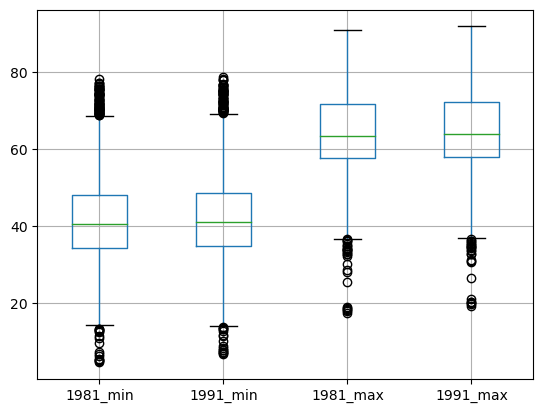

In [14]:
# Create a box plot showing the differences of the average temperatures between the two periods
climate[['1981_min', '1991_min', '1981_max', '1991_max']].boxplot()

<Axes: >

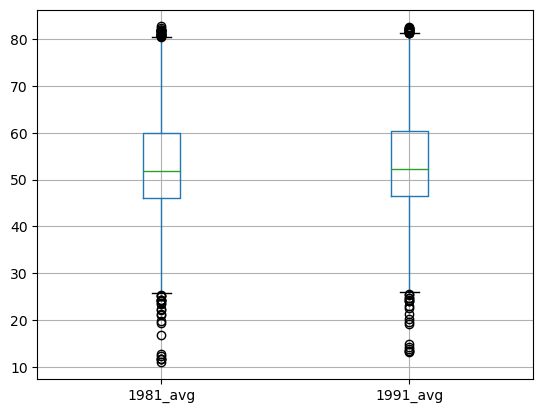

In [15]:
# Create a boxplot showing the general averages between the two periods
climate[['1981_avg', '1991_avg']].boxplot()

These are some box plots that more clearly shows the jump in temperatures from the 1981-2010 time period versus the 1991-2020 time period.

A Tableau dashboard showing the average minimum temperature differences between the 1981-2010 and 1991-2020 time period.
![Sheet%201%20%282%29%20(2).png](attachment:Sheet%201%20%282%29%20(2).png)
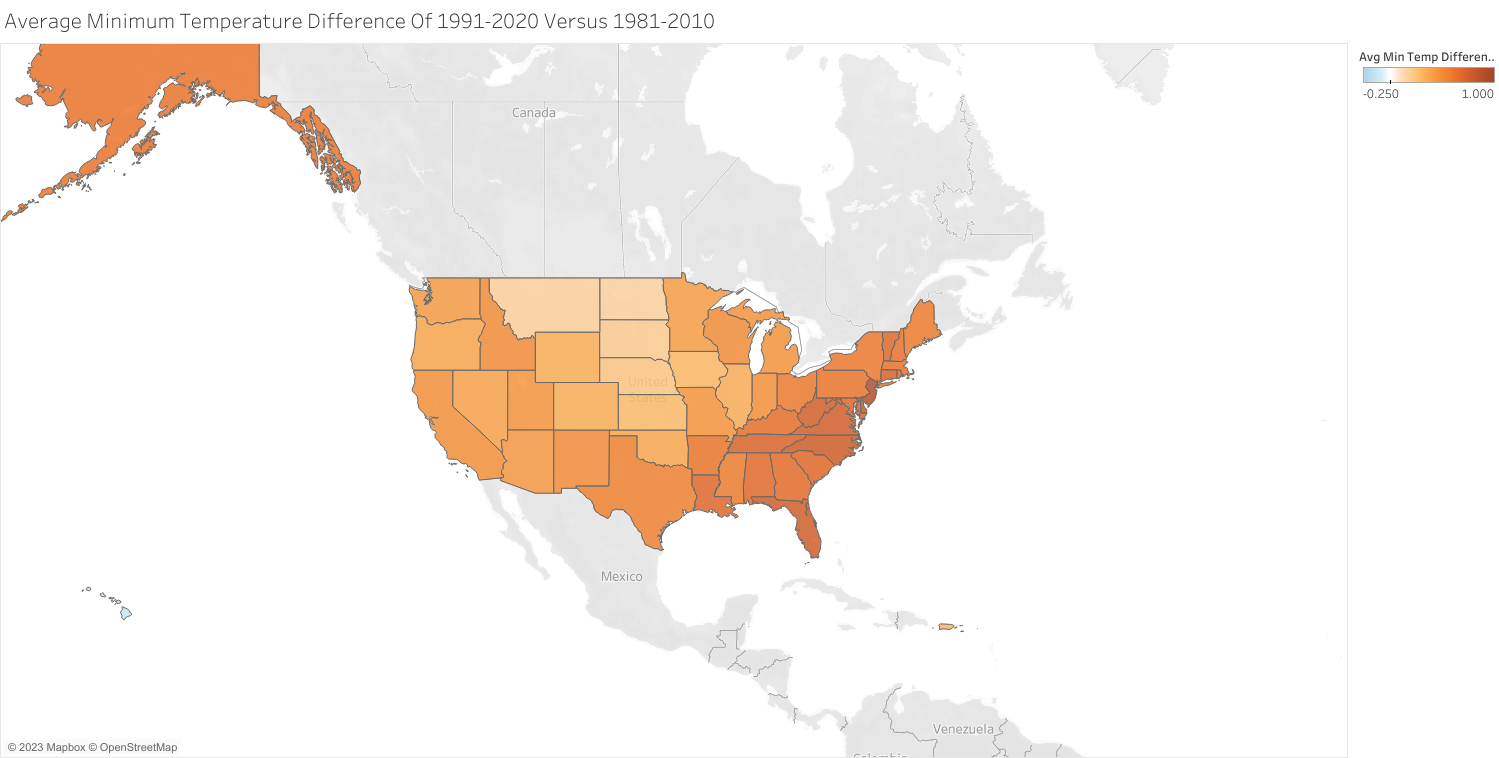

A Tableau dashboard showing the average maximum temperature differences between the 1981-2010 and 1991-2020 time period.
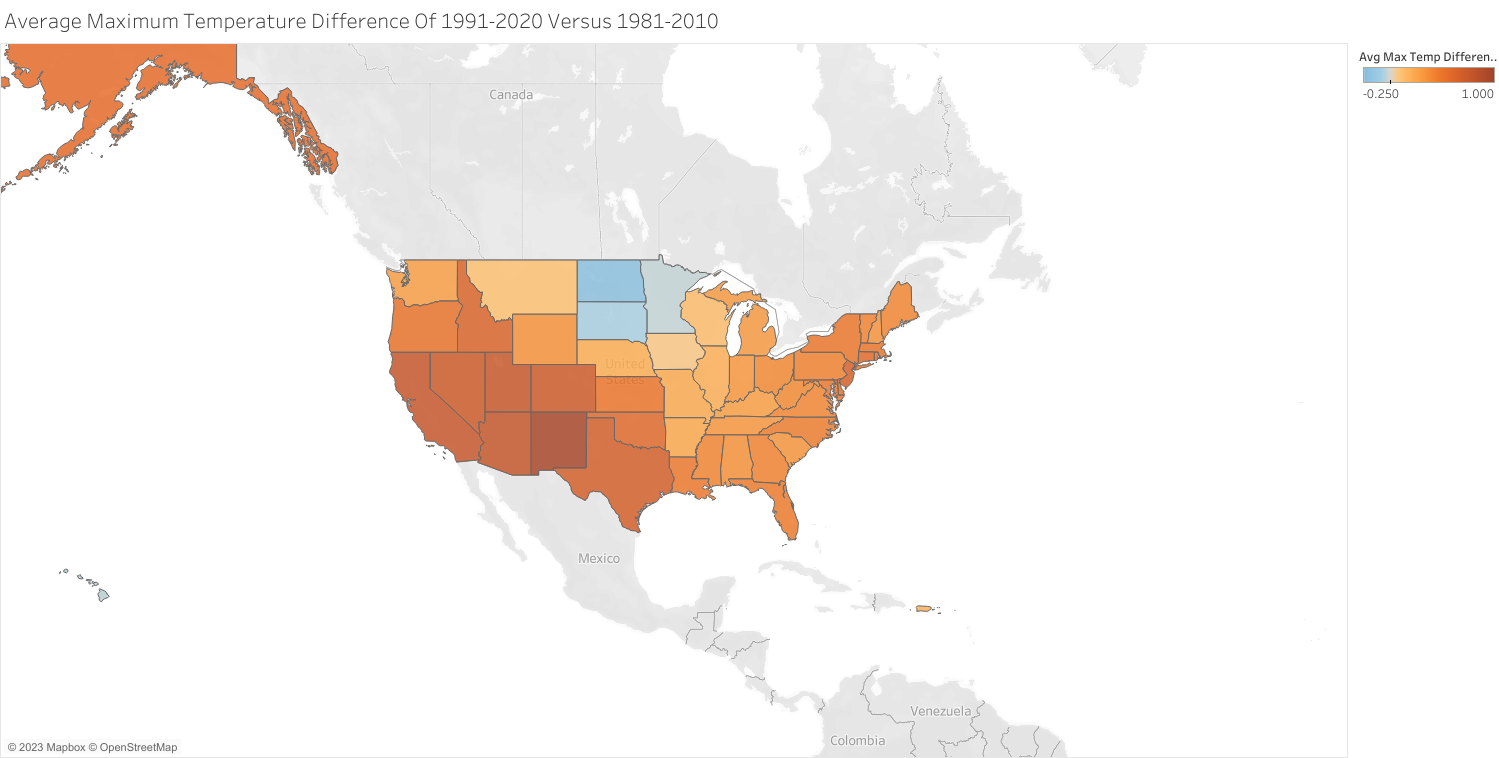

The two graphs above are Tableau dashboards that show the United States and each states' differences in temperatures. It is noticeably clear that almost all states have seen an increase of temperatures in both minimum and maximum values. The only outliers in the models are Minnesota, North Dakota, South Dakota, and Hawaii, which have seen slight decreases in temperatures. It is also shown that certain states have warmed up quicker than others. In the minimum temperature difference model, it is seen that the Eastern coast of the United States have seen the greatest increase in temperatures, while in the maximum temperature difference model, it is seen that the Southwestern part of the United States have seen the greatest increase in temperatures. Some states have reportedly seen about a 1 degree increase in temperatures like New Mexico and New Jersey, but the average has hovered around 0.3-0.6 degrees overall for most states.

## Conclusion of Analysis


In conclusion, the increase in overall temperature from the averages of the 1981-2010 period compared to the 1991-2020 period seems quite small and minute, but is actually quite concerning as it is the greatest increase in temperatures between decades in the modern era. The world is getting hotter on average and the data shows this within only the past decade or so. This worrying trend is now very real and is shown very clear in more recent data that is coming out. This will most certainly continue within the next several decades, as researchers predict that the world we are living in right now, will be the coldest time within our lifetimes. This is one of the most important reasons as to why climate change preventions should start immediately and without furthur delay.

### References


“U.S. Climate Normals.” National Centers for Environmental Information (NCEI), 12 Dec. 2023, www.ncei.noaa.gov/products/land-based-station/us-climate-normals. 

Applequist, S., A. Arguez, I. Durre, M. F. Squires, R. S. Vose, and X. Yin, 2012: 1981–2010 U.S. Hourly Normals. Bulletin of the American Meteorological Society, 93, 1637-1640. doi:10.1175/BAMS-D-11-00173.1.

Arguez, A., I. Durre, S. Applequist, R. S. Vose, M. F. Squires, X. Yin, R. R. Heim, Jr., and T. W. Owen, 2012: NOAA's 1981–2010 U.S. Climate Normals: An Overview. Bulletin of the American Meteorological Society, 93, 1687-169. doi:10.1175/BAMS-D-11-00197.1.

Arguez, A., and S. Applequist, 2013: A Harmonic Approach for Calculating Daily Temperature Normals Constrained by Homogenized Monthly Temperature Normals. Journal of Atmospheric and Oceanic Technology, 30, 1259–1265. doi:10.1175/JTECH-D-12-00195.1.

Durre, I., M. F. Squires, R. S. Vose, X. Yin, A. Arguez, and S. Applequist, 2012: NOAA's 1981–2010 U.S. Climate Normals: Monthly Precipitation, Snowfall, and Snow Depth. Journal of Applied Meteorology and Climatology, 52, 2377- 2395. doi:10.1175/JAMC-D-13-051.1.

Durre, I., and M. F. Squires, 2015: White Christmas? An Application of NOAA's 1981–2010 Daily Normals. Bulletin of the American Meteorological Society, 96, 1853-1858. doi:10.1175/BAMS-D-15-00038.1